# Decision Tree with the Iris Dataset

For an explanation of decision trees, see [our course notes](https://jennselby.github.io/MachineLearningCourseNotes/#decision-trees).

This notebook uses example code from http://scikit-learn.org/stable/modules/tree.html.

## Setup

Before you can run this code, you will need to install some extra software.

1. Install homebrew (if you don't already have it) following the [directions on their site](https://brew.sh/).
1. Install the graphviz library that will let us visualize the decision tree. In Terminal, run
>`brew install graphviz`
1. Install the pydot library that allows you to call graphviz from Python. In Terminal run
>`pip3 install pydot`.

In [1]:
from sklearn.datasets import load_iris # the iris dataset is included in scikit-learn
from sklearn import tree # for fitting our model

# these are all needed for the particular visualization we're doing
from sklearn.externals.six import StringIO
import pydot
import os.path

# to display graphs in this notebook
%matplotlib inline
import matplotlib.pyplot

## Iris Dataset

Before you go on, make sure you understand this dataset. Modify the cell below to examine different parts of the dataset that are contained in the 'iris' dictionary object.

What are the features? What are we trying to classify?

In [2]:
iris = load_iris()
iris.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])

## Plotting

Let's visualize our dataset, so that we can better understand what it looks like.

Change the first two variables to change which features you are looking at.

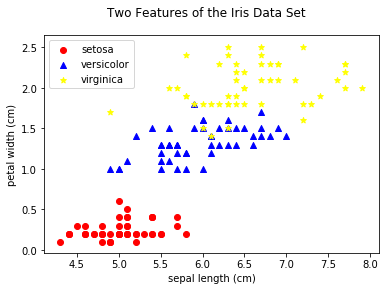

In [3]:
# Plot two of the features (the first and fourth columns, in this case)
x1_feature = 0
x2_feature = 3

x1 = iris.data[:,x1_feature]
x2 = iris.data[:,x2_feature]

# The data are in order by type. Find out where the other types start
start_type_one = list(iris.target).index(1)
start_type_two = list(iris.target).index(2)

# create a figure and label it
fig = matplotlib.pyplot.figure()
fig.suptitle('Two Features of the Iris Data Set')
matplotlib.pyplot.xlabel(iris.feature_names[x1_feature])
matplotlib.pyplot.ylabel(iris.feature_names[x2_feature])

# put the input data on the graph, with different colors and shapes for each type
scatter_0 = matplotlib.pyplot.scatter(x1[:start_type_one], x2[:start_type_one],
                                      c="red", marker="o", label=iris.target_names[0])
scatter_1 = matplotlib.pyplot.scatter(x1[start_type_one:start_type_two], x2[start_type_one:start_type_two],
                                      c="blue", marker="^", label=iris.target_names[1])
scatter_2 = matplotlib.pyplot.scatter(x1[start_type_two:], x2[start_type_two:],
                                      c="yellow", marker="*", label=iris.target_names[2])

# add a legend to explain which points are which
matplotlib.pyplot.legend(handles=[scatter_0, scatter_1, scatter_2])

# show the graph
matplotlib.pyplot.show()

## Model Training

Next, we want to fit our decision tree model to the iris data we're using.

In [4]:
# Train the model
model = tree.DecisionTreeClassifier()
model.fit(iris.data, iris.target)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

## Visualization of Model Output

Using graphviz and pydot, we can create a flowchart that shows the model decisions. The flowchart will be printed to a PDF on your desktop.

In [5]:
dot_data = StringIO()
tree.export_graphviz(model, out_file=dot_data, feature_names=iris.feature_names, class_names=iris.target_names,
                     filled=True, rounded=True, special_characters=True)
graph = pydot.graph_from_dot_data(dot_data.getvalue())[0]
graph.write_pdf(os.path.expanduser("~/Desktop/iris_decision_tree.pdf"))

# Exercise Option (Standard Difficulty)

Answer the following questions. You may find it helpful to compare the PDF output to the graph above (remember you can change which columns the graph is displaying), to see the boundaries the decision tree is finding.

1. According to the PDF, what feature values would tell you with high probability that you were looking at a setosa iris?
1. According to the PDF, which features would you look at to tell a virginica from a versicolor?
1. What is the value array in the PDF showing?
1. Try using subsets of the input data (look at the iris_inputs variable in [LogisticRegressionIris](https://nbviewer.jupyter.org/github/jennselby/MachineLearningCourseNotes/blob/master/assets/ipynb/LogisticRegressionIris.ipynb) to see how to use only some of the columns in the model). How does this change the decision tree?

# Exercise Option (Advanced)

Try fitting a Random Forest model to the iris data. See [this example](http://scikit-learn.org/stable/modules/ensemble.html#forest) to help you get started.

How does the performance and output of Random Forest compare to the single Decision Tree? Since you can't get the graphical representation of the Random Forest model the way we did for the single Decision Tree, you'll have to think of a different way to understand what the model is doing. Think about how we can [validate the performance of our classifier models](https://jennselby.github.io/MachineLearningCourseNotes/#classification-validation).